In [2]:
import pandas as pd
import numpy as np
import re
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_metrics = pd.read_csv('loss_and_rouges.csv')
train_metrics

,Step,Chest Train Loss,Chest Val Loss,Chest Rouge-1,Chest Rouge-2,Chest Rouge-L,Chest Rouge-Lsum,Chest=>Pelvis Train Loss,Chest=>Pelvis Val Loss,Chest=>Pelvis Rouge-1,...,Chest=>Pelvis=>MRI=>PetCT Rouge-1,Chest=>Pelvis=>MRI=>PetCT Rouge-2,Chest=>Pelvis=>MRI=>PetCT Rouge-L,Chest=>Pelvis=>MRI=>PetCT Rouge-Lsum,PetCT Train Loss,PetCT Val Loss,PetCT Rouge-1,PetCT Rouge-2,PetCT Rouge-L,PetCT Rouge-Lsum
0,500,0.9353,1.111371,58.0309,33.4824,55.6483,57.1714,0.7680,0.904256,61.7605,...,54.6002,36.7903,52.5661,54.0286,0.7601,1.180637,49.3299,32.1885,47.1990,48.7995
1,1000,0.8599,1.013307,59.7372,36.0709,57.5479,58.9631,0.7544,0.883162,61.0657,...,61.0956,43.2354,59.1993,60.5234,0.6788,1.046858,57.1921,39.6678,54.9941,56.6227
2,1500,0.8182,0.954402,61.3904,37.6021,59.2857,60.6262,0.7419,0.867085,62.7194,...,61.9078,44.2311,60.0517,61.3127,0.7172,0.979087,54.0776,37.6273,52.1508,53.5355
3,2000,0.8215,0.919627,63.3375,39.6388,61.2398,62.5341,0.7347,0.855368,62.0287,...,62.6610,45.0197,60.9321,62.0948,0.6934,0.950455,55.7554,39.3316,54.0017,55.2370
4,2500,0.8145,0.891270,64.0162,40.1934,62.0330,63.2521,0.7283,0.844360,63.5333,...,65.6122,47.8229,63.7969,65.0449,0.6171,0.938071,58.6611,41.9477,56.8912,58.1586
5,3000,0.7625,0.877381,64.9675,41.3586,62.9673,64.2121,0.6875,0.839866,63.1071,...,64.0240,46.7169,62.2577,63.4775,0.6107,0.910621,51.6378,36.6316,49.9514,51.1991
6,3500,0.7162,0.860353,65.2394,41.7338,63.2758,64.5007,0.6733,0.832927,63.5869,...,64.5903,47.2188,62.7737,63.9851,0.5609,0.899104,59.7523,42.9340,57.7946,59.1950
7,4000,0.7202,0.850163,65.5223,42.1809,63.5313,64.7438,0.6663,0.826216,63.6504,...,64.9584,47.6238,63.1806,64.3942,0.5639,0.888342,57.7451,41.8663,56.0272,57.2401
8,4500,0.7823,0.834662,65.4762,42.0778,63.5362,64.7589,0.6402,0.820101,63.7038,...,65.4010,48.2147,63.7025,64.8684,0.5218,0.874508,57.2351,41.1784,55.4749,56.7465
9,5000,0.6896,0.825640,65.2260,42.1165,63.3282,64.5288,0.6481,0.815409,63.3548,...,66.4517,48.7827,64.6931,65.8838,0.5479,0.865831,59.3463,42.8528,57.5399,58.8296


In [4]:
train_metrics.columns

Index(['Step', 'Chest Train Loss', 'Chest Val Loss', 'Chest Rouge-1',
       'Chest Rouge-2', 'Chest Rouge-L', 'Chest Rouge-Lsum',
       'Chest=>Pelvis Train Loss', 'Chest=>Pelvis Val Loss',
       'Chest=>Pelvis Rouge-1', 'Chest=>Pelvis Rouge-2',
       'Chest=>Pelvis Rouge-L', 'Chest=>Pelvis Rouge-Lsum',
       'Pelvis Train Loss', 'Pelvis Val Loss', 'Pelvis Rouge-1',
       'Pelvis Rouge-2', 'Pelvis Rouge-L', 'Pelvis Rouge-Lsum',
       'Chest=>Pelvis=>MRI Train Loss', 'Chest=>Pelvis=>MRI Val Loss',
       'Chest=>Pelvis=>MRI Rouge-1', 'Chest=>Pelvis=>MRI Rouge-2',
       'Chest=>Pelvis=>MRI Rouge-L', 'Chest=>Pelvis=>MRI Rouge-Lsum',
       'MRI Train Loss', 'MRI Val Loss', 'MRI Rouge-1', 'MRI Rouge-2',
       'MRI Rouge-L', 'MRI Rouge-Lsum', 'Chest=>Pelvis=>MRI=>PetCT Train Loss',
       'Chest=>Pelvis=>MRI=>PetCT Val Loss',
       'Chest=>Pelvis=>MRI=>PetCT Rouge-1',
       'Chest=>Pelvis=>MRI=>PetCT Rouge-2',
       'Chest=>Pelvis=>MRI=>PetCT Rouge-L',
       'Chest=>Pelvis=>MRI

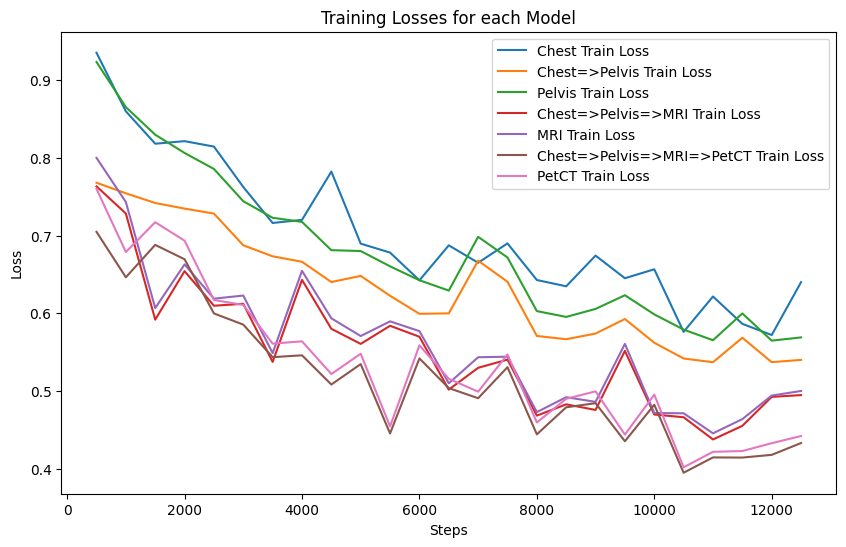

In [13]:
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
train_losses = ['Chest Train Loss', 'Chest=>Pelvis Train Loss', 'Pelvis Train Loss', 'Chest=>Pelvis=>MRI Train Loss', 'MRI Train Loss',  'Chest=>Pelvis=>MRI=>PetCT Train Loss','PetCT Train Loss']
val_losses = ['Chest Val Loss','Chest=>Pelvis Val Loss','Pelvis Val Loss','Chest=>Pelvis=>MRI Val Loss','MRI Val Loss','Chest=>Pelvis=>MRI=>PetCT Val Loss','PetCT Val Loss',]
for column in train_losses:  # Exclude the first column ('X' in this example)
    plt.plot(train_metrics['Step'], train_metrics[column], label=column)

# Set labels and title
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.title('Training Losses for each Model')

# Display legend
plt.legend()

# Show the plot
plt.show()

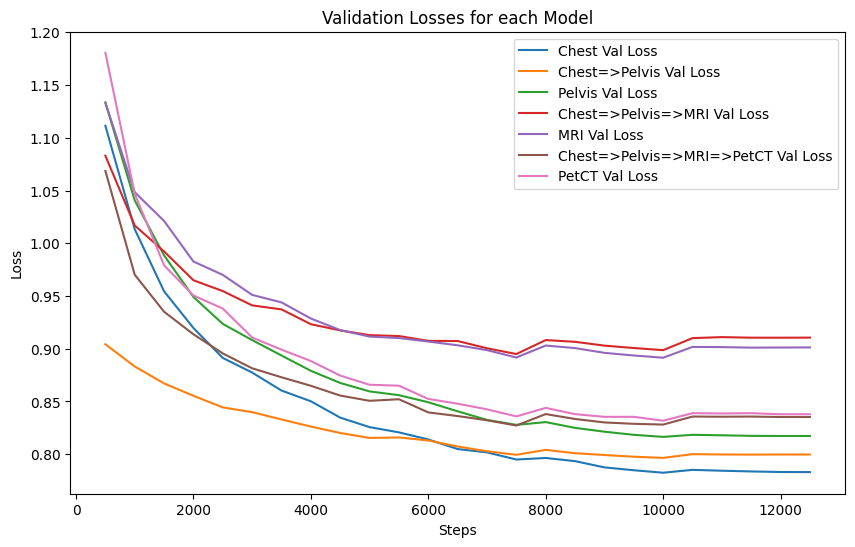

In [15]:
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
for column in val_losses:  # Exclude the first column ('X' in this example)
    plt.plot(train_metrics['Step'], train_metrics[column], label=column)

# Set labels and title
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.title('Validation Losses for each Model')

# Display legend
plt.legend()

# Show the plot
plt.show()

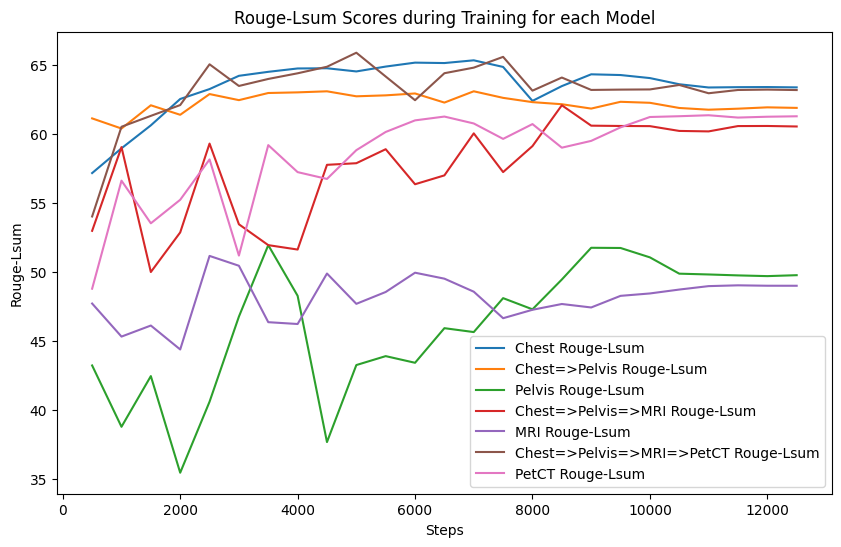

In [17]:
rougelsums = ['Chest Rouge-Lsum','Chest=>Pelvis Rouge-Lsum','Pelvis Rouge-Lsum','Chest=>Pelvis=>MRI Rouge-Lsum','MRI Rouge-Lsum', 'Chest=>Pelvis=>MRI=>PetCT Rouge-Lsum', 'PetCT Rouge-Lsum']
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
for column in rougelsums:  # Exclude the first column ('X' in this example)
    plt.plot(train_metrics['Step'], train_metrics[column], label=column)

# Set labels and title
plt.xlabel('Steps')
plt.ylabel('Rouge-Lsum')
plt.title('Rouge-Lsum Scores during Training for each Model')

# Display legend
plt.legend()

# Show the plot
plt.show()

In [6]:
train_metrics.columns

Index(['Step', 'Chest Train Loss', 'Chest Val Loss', 'Chest Rouge-1',
       'Chest Rouge-2', 'Chest Rouge-L', 'Chest Rouge-Lsum',
       'Chest=>Pelvis Train Loss', 'Chest=>Pelvis Val Loss',
       'Chest=>Pelvis Rouge-1', 'Chest=>Pelvis Rouge-2',
       'Chest=>Pelvis Rouge-L', 'Chest=>Pelvis Rouge-Lsum',
       'Pelvis Train Loss', 'Pelvis Val Loss', 'Pelvis Rouge-1',
       'Pelvis Rouge-2', 'Pelvis Rouge-L', 'Pelvis Rouge-Lsum',
       'Chest=>Pelvis=>MRI Train Loss', 'Chest=>Pelvis=>MRI Val Loss',
       'Chest=>Pelvis=>MRI Rouge-1', 'Chest=>Pelvis=>MRI Rouge-2',
       'Chest=>Pelvis=>MRI Rouge-L', 'Chest=>Pelvis=>MRI Rouge-Lsum',
       'MRI Train Loss', 'MRI Val Loss', 'MRI Rouge-1', 'MRI Rouge-2',
       'MRI Rouge-L', 'MRI Rouge-Lsum', 'Chest=>Pelvis=>MRI=>PetCT Train Loss',
       'Chest=>Pelvis=>MRI=>PetCT Val Loss',
       'Chest=>Pelvis=>MRI=>PetCT Rouge-1',
       'Chest=>Pelvis=>MRI=>PetCT Rouge-2',
       'Chest=>Pelvis=>MRI=>PetCT Rouge-L',
       'Chest=>Pelvis=>MRI

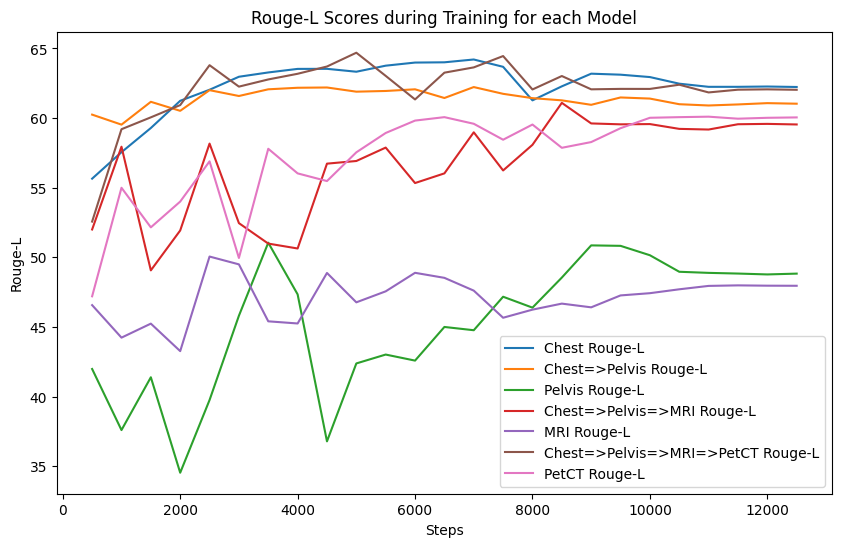

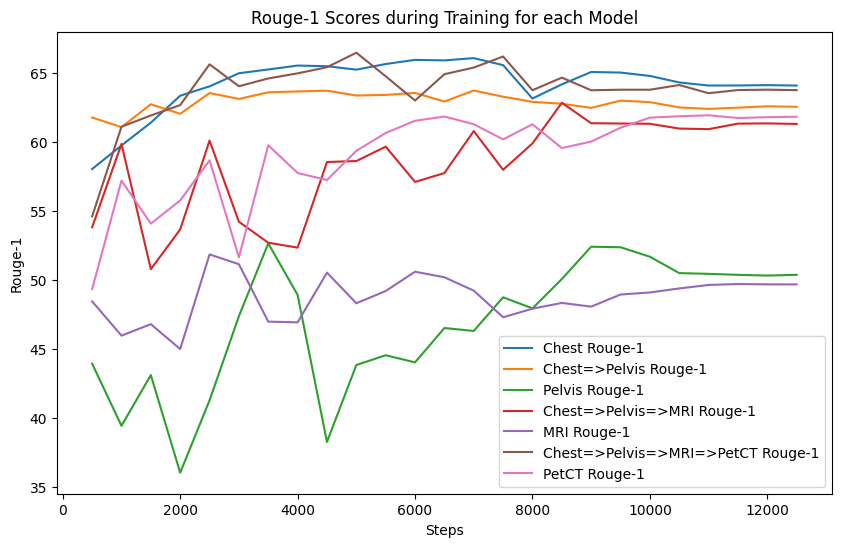

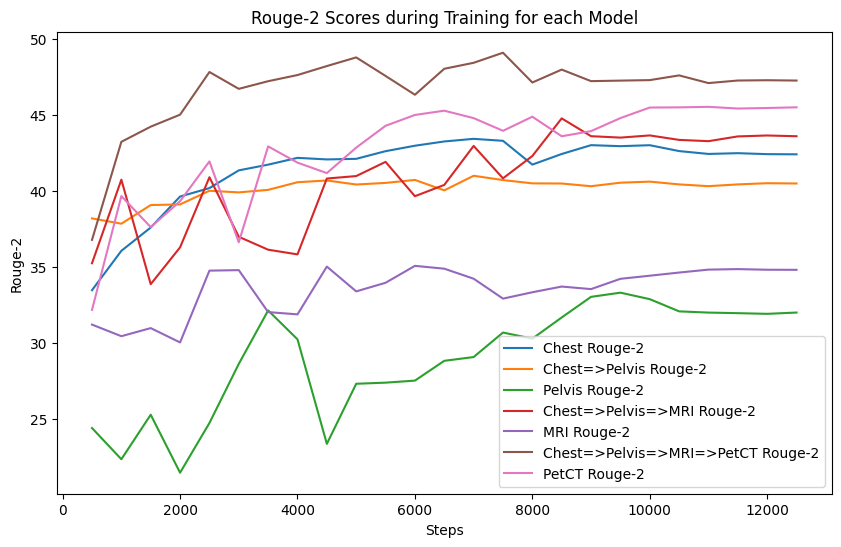

In [7]:
for i in ['L', '1', '2']:
    plt.figure(figsize=(10, 6)) 
    rouges = [f'Chest Rouge-{i}',f'Chest=>Pelvis Rouge-{i}',f'Pelvis Rouge-{i}',f'Chest=>Pelvis=>MRI Rouge-{i}',f'MRI Rouge-{i}', f'Chest=>Pelvis=>MRI=>PetCT Rouge-{i}', f'PetCT Rouge-{i}']
    for column in rouges:  # Exclude the first column ('X' in this example)
        plt.plot(train_metrics['Step'], train_metrics[column], label=column)

    # Set labels and title
    plt.xlabel('Steps')
    plt.ylabel(f'Rouge-{i}')
    plt.title(f'Rouge-{i} Scores during Training for each Model')

    # Display legend
    plt.legend()

    # Show the plot
    plt.show()